<h1>Mnist 感知器版加正则<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#初始化模型参数" data-toc-modified-id="初始化模型参数-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>初始化模型参数</a></span></li><li><span><a href="#定义交叉熵" data-toc-modified-id="定义交叉熵-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>定义交叉熵</a></span></li><li><span><a href="#设置随机梯度下降" data-toc-modified-id="设置随机梯度下降-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>设置随机梯度下降</a></span></li><li><span><a href="#初始化所有参数" data-toc-modified-id="初始化所有参数-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>初始化所有参数</a></span></li><li><span><a href="#进行train" data-toc-modified-id="进行train-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>进行train</a></span></li><li><span><a href="#评价" data-toc-modified-id="评价-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>评价</a></span></li><li><span><a href="#加隐层,加正则" data-toc-modified-id="加隐层,加正则-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>加隐层,加正则</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>结论</a></span></li></ul></div>

## 导入工具包

In [1]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None


## 导入数据

In [2]:
# Import data
data_dir = 'E:/AI/00/data/Mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting E:/AI/00/data/Mnist/input_data\train-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\train-labels-idx1-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-labels-idx1-ubyte.gz


## 初始化模型参数

In [3]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [4]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

## 定义交叉熵

In [5]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))\
    +tf.contrib.layers.l1_regularizer(0.001)(W,b)

## 设置随机梯度下降

In [6]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## 初始化所有参数

In [7]:
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

## 进行train

In [8]:
# Train
for _ in range(3000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

## 评价

In [9]:
  # Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

0.8969


毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层
- 激活函数
- 正则化`正确率为89%,下降了`
- 初始化
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

## 加隐层,加正则

In [10]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.truncated_normal([784,100],stddev=0.1))#用一个较小的正数来初始化偏置项
b1 = tf.Variable(tf.zeros([100]))
W2 = tf.Variable(tf.zeros([100, 10]))
b2 = tf.Variable(tf.zeros([10]))

In [11]:
# Define loss and optimizer
hidden1=tf.nn.sigmoid(tf.matmul(x,W1)+b1)  #这里使用传统的Sigmoid非线性激活函数
y = tf.matmul(hidden1, W2) + b2
y_ = tf.placeholder(tf.float32, [None, 10])

In [12]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))\
    + tf.contrib.layers.l2_regularizer(0.001)(W1)\
    + tf.contrib.layers.l1_regularizer(0.001)(W2,b2)

In [13]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [14]:
# Train
acc=dict()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for _ in range(20000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        acc[_]=sess.run(accuracy, feed_dict={x: mnist.test.images,
                                    y_: mnist.test.labels})


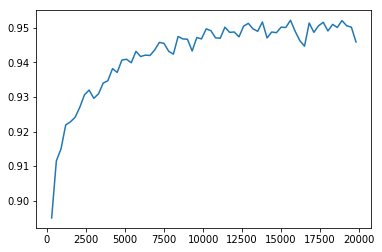

In [17]:
import matplotlib.pyplot as plt
del(acc[0])
plt.plot(acc.keys(),acc.values())
plt.show()

In [16]:
acc

{300: 0.895,
 600: 0.9115,
 900: 0.915,
 1200: 0.9219,
 1500: 0.9228,
 1800: 0.9241,
 2100: 0.927,
 2400: 0.9306,
 2700: 0.932,
 3000: 0.9296,
 3300: 0.9309,
 3600: 0.934,
 3900: 0.9347,
 4200: 0.9382,
 4500: 0.9371,
 4800: 0.9407,
 5100: 0.9409,
 5400: 0.9399,
 5700: 0.9432,
 6000: 0.9417,
 6300: 0.9421,
 6600: 0.942,
 6900: 0.9436,
 7200: 0.9458,
 7500: 0.9455,
 7800: 0.9432,
 8100: 0.9424,
 8400: 0.9475,
 8700: 0.9468,
 9000: 0.9467,
 9300: 0.9433,
 9600: 0.9472,
 9900: 0.9468,
 10200: 0.9497,
 10500: 0.9492,
 10800: 0.9471,
 11100: 0.947,
 11400: 0.9502,
 11700: 0.9487,
 12000: 0.9488,
 12300: 0.9474,
 12600: 0.9505,
 12900: 0.9513,
 13200: 0.9497,
 13500: 0.949,
 13800: 0.9517,
 14100: 0.9471,
 14400: 0.9488,
 14700: 0.9486,
 15000: 0.9502,
 15300: 0.9501,
 15600: 0.9522,
 15900: 0.949,
 16200: 0.9463,
 16500: 0.9447,
 16800: 0.9514,
 17100: 0.9487,
 17400: 0.9506,
 17700: 0.9516,
 18000: 0.9491,
 18300: 0.951,
 18600: 0.9501,
 18900: 0.9521,
 19200: 0.9506,
 19500: 0.9502,
 19800

加了隐层,加了正则,正确率为93%, 依然下降

## 结论

不应当加正则